In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 11 10:40:31 2019

@author: bzfkostr
"""

from __future__ import division
import numpy as np
import scipy.sparse
from numpy.linalg import inv
import matplotlib
import matplotlib.pyplot as plt
from math import exp
from Parameters_Diffusion import *
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

'''
This code returns the solution of the reaction-diffusion equation laplace u=D*u_t+r*u with homogeneous 
Neumann boundary conditions and the initial condition at time 0 u_0:=u(x,0).
The solution is calculated witht he Finite Difference scheme. To obtain the final concentration in each cell, we average over the 4 neighbouring
grid-cells of FD. This requires only one more cell in the calculation. 
In the script we also give some possible initial condition u_0.
The skript requires:
    
Space discretization
l+1=number of grid-cells in y direction
m+1=number of grid-cells in x direction

Time discretization
deltat=time-step size
timesteps=number of iterations 

Mathematical parameters
D=diffusion coefficient
r=first order macroscopic rate
a=domain length
'''

''' Possible functions as initial condition u_0'''





'Parameters'

h=a/(l-1) # grid-size


'Laplace Matrix with Neumann boundary conditions everywhere'

# Version 1

C=np.zeros((l, l))

for i in range(l):
    for j in range(l):
        if i==j:
            C[i,j]=4
        if abs(i-j)==1:
            
            C[i,j]=-1
           
C[0, 1]=-2
C[l-1, l-2]=-2            

print(l)



A = scipy.sparse.bmat([[C if i == j  else -2*np.identity(l) if abs(i-j)==1
                        and j==0 and i==1 else -2*np.identity(l) if abs(i-j)==1 and j==l-1 else -np.identity(l) 
                        if abs(i-j)==1 else None for i in range(m)] for j in range(m)], format='bsr').toarray()

''' Create Solution Vector (column-wise)'''
   
x=np.linspace(0,a,m+1)
y=np.linspace(0,a,l+1)

U0=np.zeros(int((l)*(m))) # solution vector at time 0
k=0
for i in range(m):
    for j in range(l):
        U0[k]=u_0(np.array([x[i], y[j]])) # Initial Condition at time 0
        k=k+1

listU=[] # list of solution vectors for each time-step
listU.append(U0)

'''Strang-Splitting with implicit Euler'''
print(c)
U=U0
B=inv(np.identity(int(l*m))+D*deltat/(h**2)*A)  #iteration matrix
for t in range(timesteps-1):
   
    U=B.dot(U)

    listU.append(U)
    
''' Translate solution vector into solution matrix'''

listM=[] # list of matrices
for t in range(timesteps): 
    if t%1==0: # which time-steps we want to save
        helpM=np.zeros((l, m))
        
        Ut=listU[t]
        k=0
       
        for j in range(m):
            for i in range(l):
                helpM[i,j]=Ut[k]
                k=k+1
        M=np.zeros((l-1,m-1))
        for i in range(l-1):
            for j in range(m-1):
                M[i,j]=(helpM[i+1,j]+helpM[i,j]+helpM[i,j+1]+helpM[i+1,j+1])/4
         
        listM.append(M)
Prey=listM
np.save('./Solutions/FDSolution_DiffusionFine.npy', Prey) 

101
250000


0.10954451150103323 240.0
0.10954451150103323


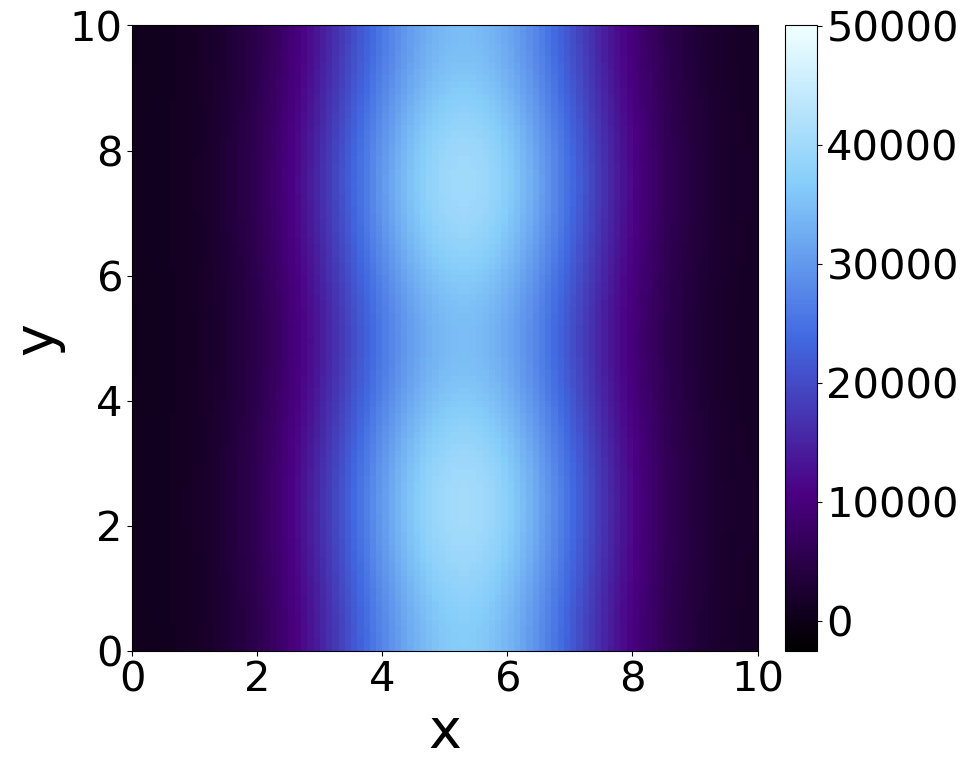

In [3]:
print(deltar, 20000*deltar**2)
# Define the custom colormap with specified colors
colors1 = ['black','indigo', 'royalblue', 'lightskyblue', 'azure']
n_bins1 = 256  # Number of bins for the colormap
Max=50000
# Create the colormap
custom_colormap1 = LinearSegmentedColormap.from_list('custom_colormap', colors1, N=n_bins1)
print(deltar)


fig = plt.figure(figsize=(9.3, 7.8))  # Match figure size
plt.imshow(Prey[240], interpolation='nearest', cmap=custom_colormap1, extent=[0, a, 0, a])
ax = plt.gca()
cbar = plt.colorbar(fraction=0.045, pad=0.04)  # Adjust padding to make colorbar smaller
ax.tick_params(labelsize=30)
cbar.ax.tick_params(labelsize=30)
plt.xlabel('x', fontsize=40)
plt.ylabel('y', fontsize=40)
plt.clim(-Max / 20, Max)
plt.tight_layout()

